In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Já é possível perceber que Age, Cabin e Embarked tem informações faltando

df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
# Deletando as colunas PassengerId, Ticket pois são valores unicos 
# e Cabin porque tem a grande maioria de valores nulos

df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [30]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,log_fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Treatment_Form_Master,Treatment_Form_Miss,Treatment_Form_Mlle,Treatment_Form_Mme,Treatment_Form_Mr,Treatment_Form_Mrs,Treatment_Form_Ms,Treatment_Form_Rev,Treatment_Form_Sir,Treatment_Form_the Countess
0,0,3,22.0,1,0,1.981001,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,38.0,1,0,4.266662,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,2.070022,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,35.0,1,0,3.972177,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,2.085672,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Análise Univariada

In [7]:
# Distribuição da variável dependente

df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [8]:
# Variáveis Indepedentes

([<matplotlib.axis.XTick at 0x7f95cfa0a710>,
 <a list of 2 Text xticklabel objects>)

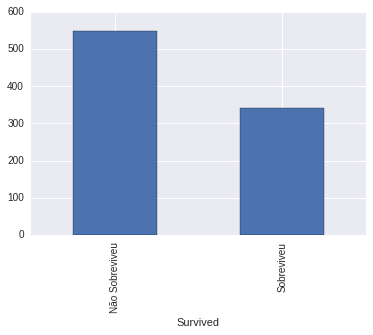

In [9]:
df.groupby('Survived').size().plot(kind='bar')
plt.xticks(range(2),('Não Sobreviveu', 'Sobreviveu'))

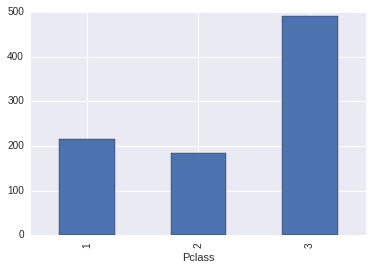

In [10]:
# Pclass: Número de pessoas na terceira classe era bem maior

df.groupby('Pclass').size().plot(kind='bar')

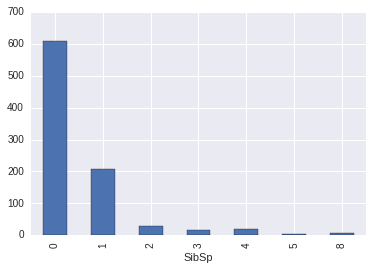

In [11]:
# Sibsp: A maioria das pessoas viajando sem irmãos e esposo(a)

df.groupby('SibSp').size().plot(kind='bar')

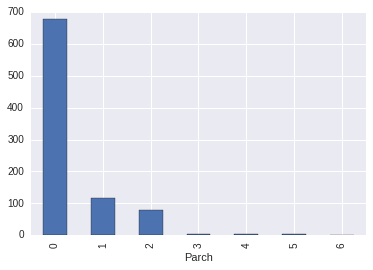

In [12]:
# Parch: A maioria das pessoas viajando sem pais e filhos

df.groupby('Parch').size().plot(kind='bar')

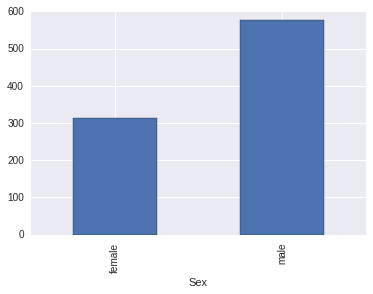

In [13]:
# Sex: Homens eram maioria

df.groupby('Sex').size().plot(kind='bar')

([<matplotlib.axis.XTick at 0x7f95cc2c6be0>,
 <a list of 3 Text xticklabel objects>)

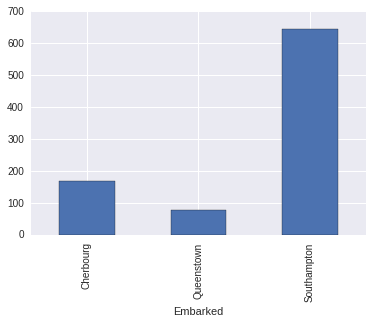

In [14]:
# Embarked: A grande maioria embarcou em Southampton
# Como existe a falta de informação de embarque de duas pessoas, vale a pena colocar como valor nessas duas pessoas
# o valor da maioria, ou seja Southampton

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.groupby('Embarked').size().plot(kind='bar')
plt.xticks(range(3),('Cherbourg', 'Queenstown', 'Southampton'))

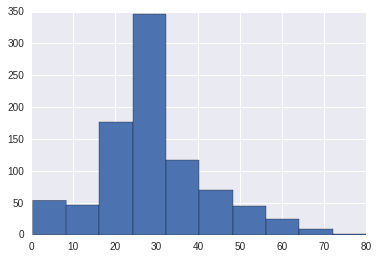

In [15]:
# Age: A maioria das pessoas tinha de 20 a 40 anos

df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Age'].hist()

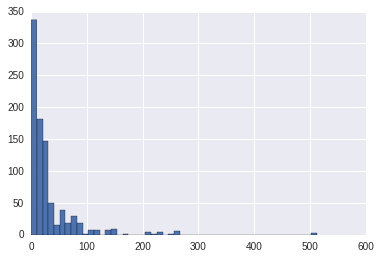

In [16]:
# Fare: Existe uma distorção nos valores para a direita, com valores extremos de tarifa(outlier)

df['Fare'].hist(bins=50)

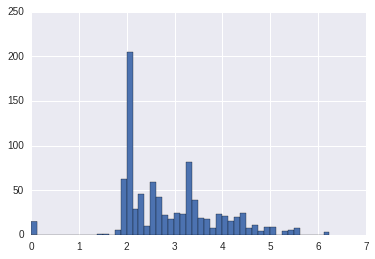

In [17]:
# Aplicando o log em uma nova coluna "log_fare", para minimizar a distorção dos valores

df['log_fare'] = np.log(df['Fare']).replace([np.inf, -np.inf],0)
df['log_fare'].hist(bins=50)

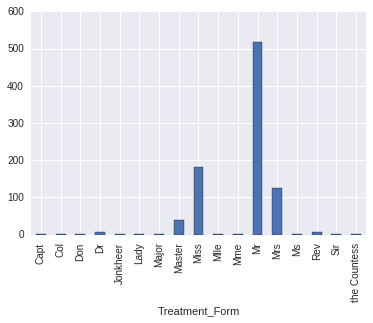

In [18]:
# Criando uma nova coluna "Treatment_Form" com a forma de tratamento por cada pessoa, o valor agrupado

def split_title(row):
    return row.split(',')[1].split('.')[0].strip()
    

df['Treatment_Form'] = df['Name'].apply(split_title)
df.groupby('Treatment_Form').size().plot(kind='bar')

In [19]:
df.groupby('Treatment_Form').size()

Treatment_Form
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

In [20]:
# Análise Bivariada

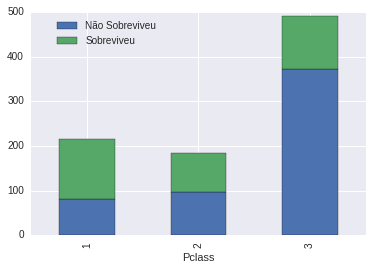

In [21]:
# Pessoas que estavam na primeira classe sobreviveram mais
# Não houve diferença significativa de sobrevivẽncia de quem estava na segunda classe
# A grande maioria de pessoas que estavam na terceira classe morreram
ct = pd.crosstab(df['Pclass'], df['Survived'])
ct.plot.bar(stacked=True)
legend = plt.legend(bbox_to_anchor=(0.4, 1))
legend.get_texts()[0].set_text('Não Sobreviveu')
legend.get_texts()[1].set_text('Sobreviveu')
plt.show()


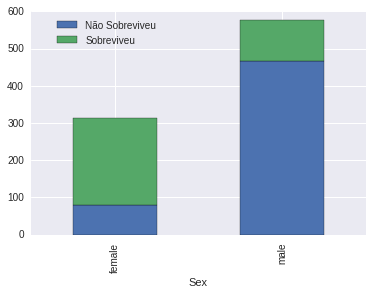

In [22]:
# Mulheres sobreviveram muito mais que homens

ct = pd.crosstab(df['Sex'], df['Survived'])
ct.plot.bar(stacked=True)
legend = plt.legend(bbox_to_anchor=(0.4, 1))
legend.get_texts()[0].set_text('Não Sobreviveu')
legend.get_texts()[1].set_text('Sobreviveu')
plt.show()

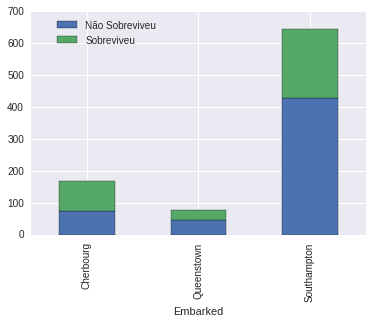

In [23]:
# A maioria das pessoas que embarcaram em Southampton não sobreviveu

ct = pd.crosstab(df['Embarked'], df['Survived'])
ct.plot.bar(stacked=True)
legend = plt.legend(bbox_to_anchor=(0.4, 1))
legend.get_texts()[0].set_text('Não Sobreviveu')
legend.get_texts()[1].set_text('Sobreviveu')
plt.xticks(range(3),('Cherbourg', 'Queenstown', 'Southampton'))
plt.show()

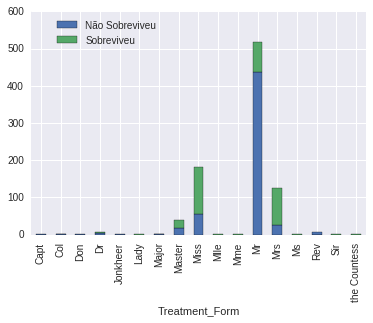

In [24]:
# Confirmando pela forma de tratamento que mulheres tem uma maior taxa de sobrevivência

ct = pd.crosstab(df['Treatment_Form'], df['Survived'])
ct.plot.bar(stacked=True)
legend = plt.legend(bbox_to_anchor=(0.4, 1))
legend.get_texts()[0].set_text('Não Sobreviveu')
legend.get_texts()[1].set_text('Sobreviveu')
plt.show()

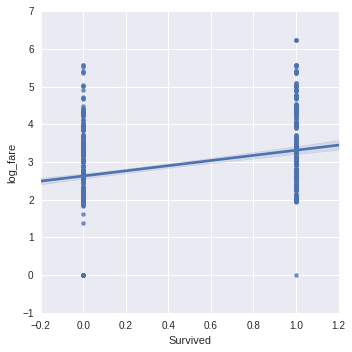

In [25]:
# Uma tendência um pouco maior de sobrevivência para quem teve tarifas maiores

sns.lmplot('Survived', 'log_fare', data=df)

In [26]:
df.count()

Survived          891
Pclass            891
Name              891
Sex               891
Age               891
SibSp             891
Parch             891
Fare              891
Embarked          891
log_fare          891
Treatment_Form    891
dtype: int64

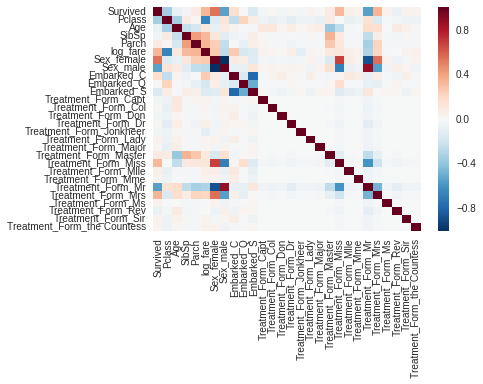

In [27]:
# Heatmap da correlação entre as variáveis

df.drop(['Name', 'Fare'], axis=1, inplace=True)
df = pd.get_dummies(df)

sns.heatmap(df.corr())

In [28]:
corr = df.corr()
corr_with_target = corr.ix[0][1:]
corr_with_target.sort_values(ascending=False, inplace=True)

In [29]:
# Valores de correlação ordenados
corr_with_target

Sex_female                     0.543351
Treatment_Form_Mrs             0.339040
log_fare                       0.331805
Treatment_Form_Miss            0.327093
Embarked_C                     0.168240
Treatment_Form_Master          0.085221
Parch                          0.081629
Treatment_Form_Mlle            0.060095
Treatment_Form_Mme             0.042470
Treatment_Form_Ms              0.042470
Treatment_Form_Lady            0.042470
Treatment_Form_Sir             0.042470
Treatment_Form_the Countess    0.042470
Treatment_Form_Major           0.011329
Treatment_Form_Col             0.011329
Treatment_Form_Dr              0.008185
Embarked_Q                     0.003650
Treatment_Form_Don            -0.026456
Treatment_Form_Capt           -0.026456
Treatment_Form_Jonkheer       -0.026456
SibSp                         -0.035322
Treatment_Form_Rev            -0.064988
Age                           -0.069809
Embarked_S                    -0.149683
Pclass                        -0.338481
